# 01 예측에 사용할 데이터 셋팅하기

In [1]:
from google.colab import drive

import os
import pandas as pd
import numpy as np

In [2]:
drive.mount('/content/drive')
path = "/content/drive/MyDrive/temp2"

Mounted at /content/drive


In [4]:
# 삼성전자 종목코드
stock_code = '005930'
start_yr = '2021'

In [5]:
stock_path = os.path.join(path, f"{stock_code}_{start_yr}_indicators.csv")
df = pd.read_csv(stock_path)
df

,Date,Open,High,Low,Close,Volume,Change,재무제표기준일,자산총계,부채총계,...,MA20,MA60,Daily Return,재무제표기준연도,순이익률(NPM),영업이익률(OM),자산회전율,자기자본이익률(ROE),부채비율,유동비율
0,2021-01-04,81000,84400,80200,83000,38655276,0.024691,2020-12-31,378235718000000,102287702000000,...,NaN,NaN,NaN,2020,11.15,15.2,62.61,9.57,37.07,262.17
1,2021-01-05,81600,83900,81600,83900,35335669,0.010843,2020-12-31,378235718000000,102287702000000,...,NaN,NaN,0.010843,2020,11.15,15.2,62.61,9.57,37.07,262.17
2,2021-01-06,83300,84500,82100,82200,42089013,-0.020262,2020-12-31,378235718000000,102287702000000,...,NaN,NaN,-0.020262,2020,11.15,15.2,62.61,9.57,37.07,262.17
3,2021-01-07,82800,84200,82700,82900,32644642,0.008516,2020-12-31,378235718000000,102287702000000,...,NaN,NaN,0.008516,2020,11.15,15.2,62.61,9.57,37.07,262.17
4,2021-01-08,83300,90000,83000,88800,59013307,0.071170,2020-12-31,378235718000000,102287702000000,...,NaN,NaN,0.071170,2020,11.15,15.2,62.61,9.57,37.07,262.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,2024-06-24,79700,80900,79500,80600,15454227,0.007500,2024-03-31,470899812000000,98983688000000,...,77480.0,79060.000000,0.007500,2024,NaN,NaN,NaN,NaN,NaN,NaN
856,2024-06-25,80600,81800,80100,80800,19088458,0.002481,2024-03-31,470899812000000,98983688000000,...,77660.0,79075.000000,0.002481,2024,NaN,NaN,NaN,NaN,NaN,NaN
857,2024-06-26,80100,81400,79900,81300,17783242,0.006188,2024-03-31,470899812000000,98983688000000,...,77845.0,79100.000000,0.006188,2024,NaN,NaN,NaN,NaN,NaN,NaN
858,2024-06-27,81300,81600,80500,81600,11739720,0.003690,2024-03-31,470899812000000,98983688000000,...,78165.0,79113.333333,0.003690,2024,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df = df.dropna()
df.shape

(741, 34)

### 문제 데이터, 정답 데이터 나눠주기

In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Change', '재무제표기준일',
       '자산총계', '부채총계', '자본총계', '유동자산', '비유동자산', '유동부채', '비유동부채', '영업수익',
       '매출총이익', '영업이익', '당기순이익(손실)', '영업활동현금흐름', '투자활동현금흐름', '재무활동현금흐름',
       'Change_Rate', 'Change_MA20', 'MA20', 'MA60', 'Daily Return',
       '재무제표기준연도', '순이익률(NPM)', '영업이익률(OM)', '자산회전율', '자기자본이익률(ROE)', '부채비율',
       '유동비율'],
      dtype='object')

In [ ]:
# 다음 날의 종가를 예측 할 것이기에 shift(-1)을 적용하여 1칸씩 땡겨준다
# 다음 날의 종가를 예측 할 것이기에 마지막 인덱스의 target 값은 존재하지 않으므로 해당 인덱스는 drop 한다
Y_df = df[["Close"]].shift(-1)
Y_df.columns = ["target"]
Y_df = Y_df.iloc[:-1].reset_index(drop=True)

index = "Date"
X_df = df.drop(columns=[index, "재무제표기준일", "Change_Rate", "Daily Return", "Change"])
X_df = X_df.iloc[:-1].reset_index(drop=True)

index_df = df[index]
index_df = index_df.iloc[1:]

In [ ]:
XY_df = pd.concat([X_df, Y_df], axis=1)
XY_df

,Open,High,Low,Close,Volume,자산총계,부채총계,자본총계,유동자산,비유동자산,...,MA20,MA60,재무제표기준연도,순이익률(NPM),영업이익률(OM),자산회전율,자기자본이익률(ROE),부채비율,유동비율,target
0,82400,82700,81400,81400,17240518,378235718000000,102287702000000,275948016000000,198215579000000,180020139000000,...,81900.0,83886.666667,2020,11.15,15.20,62.61,9.57,37.07,262.17,82900.0
1,82500,83000,82000,82900,18676461,392826274000000,118557683000000,274268591000000,209155353000000,183670921000000,...,81925.0,83885.000000,2021,14.27,18.47,65.54,13.09,39.92,247.58,84800.0
2,84000,85200,83900,84800,22997538,392826274000000,118557683000000,274268591000000,209155353000000,183670921000000,...,82060.0,83900.000000,2021,14.27,18.47,65.54,13.09,39.92,247.58,85400.0
3,85800,86000,84800,85400,16255990,392826274000000,118557683000000,274268591000000,209155353000000,183670921000000,...,82230.0,83953.333333,2021,14.27,18.47,65.54,13.09,39.92,247.58,86000.0
4,86200,86200,85100,86000,19042023,392826274000000,118557683000000,274268591000000,209155353000000,183670921000000,...,82460.0,84005.000000,2021,14.27,18.47,65.54,13.09,39.92,247.58,85600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,79600,79900,77800,78900,26724761,455905980000000,92228115000000,363677865000000,195936557000000,259969423000000,...,73965.0,74351.666667,2023,5.98,2.54,56.80,4.26,25.36,258.77,78200.0
736,79600,79800,77800,78200,18703996,455905980000000,92228115000000,363677865000000,195936557000000,259969423000000,...,74230.0,74390.000000,2023,5.98,2.54,56.80,4.26,25.36,258.77,79900.0
737,79700,80100,79200,79900,30551494,455905980000000,92228115000000,363677865000000,195936557000000,259969423000000,...,74585.0,74445.000000,2023,5.98,2.54,56.80,4.26,25.36,258.77,79800.0
738,79200,80000,79200,79800,17424595,455905980000000,92228115000000,363677865000000,195936557000000,259969423000000,...,74930.0,74475.000000,2023,5.98,2.54,56.80,4.26,25.36,258.77,80800.0


# 02 ML을 이용한 가격 예측
- pycaret은 low-code로 machine learning을 구현할 수 있도록 도와줍니다

- pycaret를 사용하기 위해 설치를 먼저 진행해줍니다

In [ ]:
!pip install pycaret -q

In [ ]:
from pycaret.regression import *

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
XY_df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', '자산총계', '부채총계', '자본총계',
       '유동자산', '비유동자산', '유동부채', '비유동부채', '영업수익', '매출총이익', '영업이익', '당기순이익(손실)',
       '영업활동현금흐름', '투자활동현금흐름', '재무활동현금흐름', 'Change_MA20', 'MA20', 'MA60',
       '재무제표기준연도', '순이익률(NPM)', '영업이익률(OM)', '자산회전율', '자기자본이익률(ROE)', '부채비율',
       '유동비율', 'target'],
      dtype='object')

In [ ]:
XY_df

,Open,High,Low,Close,Volume,자산총계,부채총계,자본총계,유동자산,비유동자산,...,MA20,MA60,재무제표기준연도,순이익률(NPM),영업이익률(OM),자산회전율,자기자본이익률(ROE),부채비율,유동비율,target
0,82400,82700,81400,81400,17240518,378235718000000,102287702000000,275948016000000,198215579000000,180020139000000,...,81900.0,83886.666667,2020,11.15,15.20,62.61,9.57,37.07,262.17,82900.0
1,82500,83000,82000,82900,18676461,392826274000000,118557683000000,274268591000000,209155353000000,183670921000000,...,81925.0,83885.000000,2021,14.27,18.47,65.54,13.09,39.92,247.58,84800.0
2,84000,85200,83900,84800,22997538,392826274000000,118557683000000,274268591000000,209155353000000,183670921000000,...,82060.0,83900.000000,2021,14.27,18.47,65.54,13.09,39.92,247.58,85400.0
3,85800,86000,84800,85400,16255990,392826274000000,118557683000000,274268591000000,209155353000000,183670921000000,...,82230.0,83953.333333,2021,14.27,18.47,65.54,13.09,39.92,247.58,86000.0
4,86200,86200,85100,86000,19042023,392826274000000,118557683000000,274268591000000,209155353000000,183670921000000,...,82460.0,84005.000000,2021,14.27,18.47,65.54,13.09,39.92,247.58,85600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,79600,79900,77800,78900,26724761,455905980000000,92228115000000,363677865000000,195936557000000,259969423000000,...,73965.0,74351.666667,2023,5.98,2.54,56.80,4.26,25.36,258.77,78200.0
736,79600,79800,77800,78200,18703996,455905980000000,92228115000000,363677865000000,195936557000000,259969423000000,...,74230.0,74390.000000,2023,5.98,2.54,56.80,4.26,25.36,258.77,79900.0
737,79700,80100,79200,79900,30551494,455905980000000,92228115000000,363677865000000,195936557000000,259969423000000,...,74585.0,74445.000000,2023,5.98,2.54,56.80,4.26,25.36,258.77,79800.0
738,79200,80000,79200,79800,17424595,455905980000000,92228115000000,363677865000000,195936557000000,259969423000000,...,74930.0,74475.000000,2023,5.98,2.54,56.80,4.26,25.36,258.77,80800.0


### 데이터 전처리하기

`setup()`을 이용하면 학습에 사용 할 데이터를 간단하게 전처리 할 수 있어요

추후에 학습이 완료 된 AI에게 실제로 `test_size`에 해당하는 데이터를 예측하기 위해 test_size 만큼의 행을 제거한 후 `set_up()`에게 전달합니다

인공지능은 각 컬럼이 가지는 값들의 크기에 따라 크기가 큰 것을 더 중요시하게 여기는 편향이 생길 수 있습니다.

하여 `normalize = True`로 설정하여 각 컬럼에 z-score 정규화를 적용해줍니다.

pycaret에서는 normalize의 기본 method가 'zscore'이며 그 이외에 'minmax', 'maxabs', 'robust'로 설정해주실 수 있어요

```python
# 예시
setup(
    XY_df.iloc[:-test_size],
    target='target',
    train_size=0.9,
    normalize = True,
    normalize_method='minmax'
    )
```
[관련 내용 링크](https://pycaret.gitbook.io/docs/get-started/preprocessing/scale-and-transform)

In [ ]:
# 필요한 모듈 임포트
test_size = 30
exp1 = setup(
    XY_df.iloc[:-test_size],
    target='target',
    train_size=0.9,
    normalize = True
    )

,Description,Value
0,Session id,769
1,Target,target
2,Target type,Regression
3,Original data shape,"(710, 30)"
4,Transformed data shape,"(710, 30)"
5,Transformed train set shape,"(639, 30)"
6,Transformed test set shape,"(71, 30)"
7,Numeric features,29
8,Preprocess,True
9,Imputation type,simple


### 여러 모델별로 성능 비교해보기

compare_models()를 사용하면 여러 모델들의 성능을 한번에 비교하고 가장 성능 좋은 모델을 가져올 수 있습니다

In [ ]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,685.3310,817031.8471,900.7740,0.9857,0.0133,0.0101,0.0270
lr,Linear Regression,689.9885,820300.6289,901.7844,0.9856,0.0133,0.0101,0.0260
lasso,Lasso Regression,689.1246,820797.4557,902.0206,0.9856,0.0133,0.0101,0.0270
llar,Lasso Least Angle Regression,692.3709,817985.0894,900.7023,0.9856,0.0133,0.0102,0.0250
br,Bayesian Ridge,690.4222,819616.7501,901.4539,0.9856,0.0133,0.0101,0.0240
omp,Orthogonal Matching Pursuit,692.9253,823910.8370,904.1482,0.9855,0.0134,0.0102,0.0240
ridge,Ridge Regression,698.0746,829163.9192,906.6026,0.9854,0.0134,0.0102,0.0250
gbr,Gradient Boosting Regressor,749.2643,935621.1324,962.8213,0.9836,0.0144,0.0111,0.0430
rf,Random Forest Regressor,747.7354,934012.8655,962.2771,0.9836,0.0143,0.0110,0.0630
et,Extra Trees Regressor,761.5530,964693.2625,978.7578,0.9831,0.0145,0.0112,0.0540


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

- MAE(Mean Absolute Error): 예측값과 실제값의 절대값 오차들의 평균, 낮을 수록 좋은 것
- MSE(Mean Squared Error): 예측값과 실제값의 오차 제곱들의 평균, 낮을 수록 좋은 것
- R2: 0 ~ 1의 사이값을 가지며 1일수록 좋은 모델

### 학습 시 사용하지 않은 데이터로 가격 예측

predict_model()을 사용하면 예측 값을 얻을 수 있어요

예측 시 data는 AI가 학습하지 않았던 XY_df의 마지막 test_size 만큼만 넘겨주도록 해요

In [ ]:
predictions = predict_model(best_model, data=XY_df.iloc[-test_size:, :-1])
predictions["prediction_label"] = predictions[["prediction_label"]]
predictions.head()

,Open,High,Low,Close,Volume,자산총계,부채총계,자본총계,유동자산,비유동자산,...,MA20,MA60,재무제표기준연도,순이익률(NPM),영업이익률(OM),자산회전율,자기자본이익률(ROE),부채비율,유동비율,prediction_label
710,74200,74400,73000,73000,14120600,455905980000000,92228115000000,363677865000000,195936557000000,259969423000000,...,73970.0,73893.335938,2023,5.98,2.54,56.799999,4.26,25.360001,258.769989,72994.646663
711,73300,73400,72500,72800,13444781,455905980000000,92228115000000,363677865000000,195936557000000,259969423000000,...,74060.0,73898.335938,2023,5.98,2.54,56.799999,4.26,25.360001,258.769989,72752.518944
712,72800,73900,72800,73800,12726404,455905980000000,92228115000000,363677865000000,195936557000000,259969423000000,...,74165.0,73916.664062,2023,5.98,2.54,56.799999,4.26,25.360001,258.769989,73849.214694
713,73700,73700,72800,73300,14681477,455905980000000,92228115000000,363677865000000,195936557000000,259969423000000,...,74095.0,73925.000000,2023,5.98,2.54,56.799999,4.26,25.360001,258.769989,73058.239810
714,73400,73700,72900,73000,11503495,455905980000000,92228115000000,363677865000000,195936557000000,259969423000000,...,73990.0,73928.335938,2023,5.98,2.54,56.799999,4.26,25.360001,258.769989,72925.147405


### 실제값, 예측값을 나란히 비교해보기

pd.concat()에서 axis=1을 넘겨주면 데이터들을 위아래가 아닌 옆으로 이어 붙여줄 수 있어요

In [ ]:
result_df = pd.concat([
    index_df.iloc[-test_size:].reset_index(drop=True),
    predictions["prediction_label"].reset_index(drop=True),
    Y_df.iloc[-test_size:].reset_index(drop=True)
    ],
    axis=1, ignore_index=True)
result_df.columns = ["Date", "pred", "true"]

In [ ]:
result_df

,Date,pred,true
0,2024-02-16,72994.646663,72800.0
1,2024-02-19,72752.518944,73800.0
2,2024-02-20,73849.214694,73300.0
3,2024-02-21,73058.239810,73000.0
4,2024-02-22,72925.147405,73100.0
5,2024-02-23,72907.243674,72900.0
6,2024-02-26,72943.003964,72800.0
7,2024-02-27,72821.034367,72900.0
8,2024-02-28,72840.410839,73200.0
9,2024-02-29,73280.891121,73400.0


### 실제값, 예측값 시각화해보기

DataFrame으로만 확인하면 눈에 잘 들어오지 않습니다.   
시각화로 한번에 확인해보아요

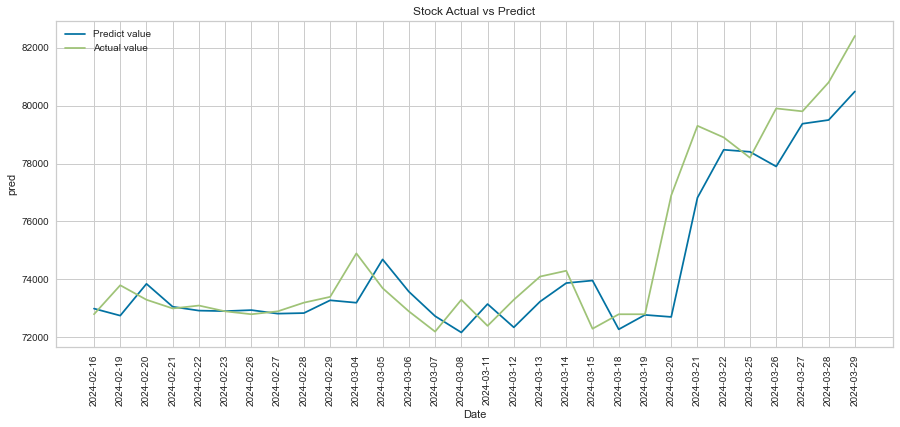

In [ ]:
plt.figure(figsize=(15,6))
sns.lineplot(
    result_df,
    x=result_df["Date"],
    y=result_df["pred"],
    label="Predict value"
)
sns.lineplot(
    result_df,
    x=result_df["Date"],
    y=result_df["true"],
    label="Actual value"
)
plt.title("Stock Actual vs Predict")
plt.xticks(rotation=90)
plt.show()

- 예측값이 실제 값의 후행 성격으로 산출되었습니다.
- 이런 경우 현실에서는 전혀 사용하지 못할 정도의 모델인 것 같습니다.
- 이러한 결과가 나온 이유는 데이터의 양이 부족하거나, 낮은 데이터의 퀄리티(보조지표 부족함 등), 머신러닝 모델의 한계 등이 원인입니다.
- 머신러닝은 하나의 row만 참고하여 그 row의 예측값을 산출하는 것이기에 시계열의 의미를 제대로 파악하지 못합니다.

### 03 ML을 이용한 가격 상승 및 하락 분류

In [ ]:
from pycaret.classification import *

### 상승 및 하락 라벨링하기

- 오늘 대비 내일 종가가 상승했다면 bull에는 1을, bear에는 0을 할당하고 만약 하락했다면 bull에는 0을 bear에는 0을 부여해보아요
- `.diff()`는 행간의 차이를 계산합니다
- `.apply()`는 각 값을 가져와 함수에게 전달한 후 반환 받은 값을 가져온 값의 위치에 대체하는 함수입니다

In [ ]:
def assign_bull(x):
    if x > 0:
        return 1
    else:
        return 0

def assign_bear(x):
    if x < 0:
        return 1
    else:
        return 0

XY_df['bull'] = XY_df['Close'].diff().apply(assign_bull).reset_index(drop=True)
XY_df['bear'] = XY_df['Close'].diff().apply(assign_bear).reset_index(drop=True)

### 예측하기 위한 데이터셋 구현

In [ ]:
Y_bull_df = XY_df[["bull"]]
Y_bear_df = XY_df[["bear"]]

In [ ]:
XY_bull_df = pd.concat([X_df, Y_bull_df], axis=1)
XY_bear_df = pd.concat([X_df, Y_bear_df], axis=1)

In [ ]:
XY_bull_df.head(10)

,Open,High,Low,Close,Volume,자산총계,부채총계,자본총계,유동자산,비유동자산,...,MA20,MA60,재무제표기준연도,순이익률(NPM),영업이익률(OM),자산회전율,자기자본이익률(ROE),부채비율,유동비율,bull
0,82400,82700,81400,81400,17240518,378235718000000,102287702000000,275948016000000,198215579000000,180020139000000,...,81900.0,83886.666667,2020,11.15,15.20,62.61,9.57,37.07,262.17,0
1,82500,83000,82000,82900,18676461,392826274000000,118557683000000,274268591000000,209155353000000,183670921000000,...,81925.0,83885.000000,2021,14.27,18.47,65.54,13.09,39.92,247.58,1
2,84000,85200,83900,84800,22997538,392826274000000,118557683000000,274268591000000,209155353000000,183670921000000,...,82060.0,83900.000000,2021,14.27,18.47,65.54,13.09,39.92,247.58,1
3,85800,86000,84800,85400,16255990,392826274000000,118557683000000,274268591000000,209155353000000,183670921000000,...,82230.0,83953.333333,2021,14.27,18.47,65.54,13.09,39.92,247.58,1
4,86200,86200,85100,86000,19042023,392826274000000,118557683000000,274268591000000,209155353000000,183670921000000,...,82460.0,84005.000000,2021,14.27,18.47,65.54,13.09,39.92,247.58,1
5,86100,86200,85400,85600,17885538,392826274000000,118557683000000,274268591000000,209155353000000,183670921000000,...,82695.0,83951.666667,2021,14.27,18.47,65.54,13.09,39.92,247.58,0
6,85700,85700,84100,84700,19244259,392826274000000,118557683000000,274268591000000,209155353000000,183670921000000,...,82830.0,83846.666667,2021,14.27,18.47,65.54,13.09,39.92,247.58,0
7,84700,84900,83400,83600,18193707,392826274000000,118557683000000,274268591000000,209155353000000,183670921000000,...,82870.0,83730.000000,2021,14.27,18.47,65.54,13.09,39.92,247.58,0
8,84100,84100,83100,83200,12915282,392826274000000,118557683000000,274268591000000,209155353000000,183670921000000,...,82940.0,83621.666667,2021,14.27,18.47,65.54,13.09,39.92,247.58,0
9,83000,84500,82800,84000,15238206,392826274000000,118557683000000,274268591000000,209155353000000,183670921000000,...,83000.0,83526.666667,2021,14.27,18.47,65.54,13.09,39.92,247.58,1


- bull 컬럼을 잘 살펴보면 이전 row의 Close 값 대비하여 현 row의 Close 값이 상승하였으면 1, 아니면 0이 부여된 것을 확인할 수 있습니다.

### 데이터 전처리 및 모델 학습 함수 선언

In [ ]:
def get_model(df, target, test_size):
    setup(
        df.iloc[:-test_size],
        target=target,
        train_size=0.9,
        verbose=False,
        normalize=True
        )
    return compare_models()

### 데이터 전처리 및 상승 예측 모델 학습
- 최근 30일 전까지 학습 데이터로 사용하고 학습 된 모델을 사용하여 최근 30일에 대하여 예측해봅니다

In [ ]:
test_size = 30
bull_model = get_model(XY_bull_df, "bull", test_size)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.7699,0.8618,0.6915,0.7816,0.7319,0.5320,0.5367,0.0310
ridge,Ridge Classifier,0.7589,0.0000,0.6676,0.7793,0.7152,0.5090,0.5170,0.0270
lr,Logistic Regression,0.7152,0.8010,0.5928,0.7360,0.6517,0.4172,0.4275,0.2710
svm,SVM - Linear Kernel,0.6745,0.0000,0.6134,0.6557,0.6287,0.3410,0.3458,0.0270
lightgbm,Light Gradient Boosting Machine,0.6463,0.7133,0.5616,0.6250,0.5872,0.2811,0.2851,0.0360
xgboost,Extreme Gradient Boosting,0.6432,0.6932,0.5583,0.6276,0.5868,0.2757,0.2800,0.0660
gbc,Gradient Boosting Classifier,0.6151,0.6571,0.5102,0.5976,0.5487,0.2166,0.2204,0.0490
ada,Ada Boost Classifier,0.5978,0.5999,0.4863,0.5746,0.5222,0.1807,0.1845,0.0350
rf,Random Forest Classifier,0.5759,0.5904,0.4654,0.5299,0.4892,0.1340,0.1350,0.0570
dt,Decision Tree Classifier,0.5665,0.5626,0.5171,0.5271,0.5202,0.1253,0.1259,0.0290


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

### Confusion Matrix

![image.png](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*d0UCCIF10Soi7VQGxdVrWQ.jpeg)   
출처: Understanding the Confusion Matrix | by Dany W. | Medium

- Accuracy (정확도): 정확도는 전체 예측 중 올바르게 예측한 비율로, (올바른 예측 수) / (전체 예측 수)로 계산됩니다. 단, 클래스 불균형이 있는 경우에는 정확도만으로 성능을 평가하는 것이 어려울 수 있습니다.
- AUC (ROC AUC): AUC는 Receiver Operating Characteristic(ROC) 곡선 아래의 면적으로, 이진 분류 모델의 성능을 나타냅니다. AUC 값이 1에 가까울수록 모델이 잘 분류하는 것이며, 0.5는 무작위 예측을 의미합니다.
- Recall (재현율): 재현율은 실제 양성 중 모델이 양성으로 올바르게 예측한 비율로, (진짜 양성) / (진짜 양성 + 거짓 음성)으로 계산됩니다. 민감도 또는 참 양성 비율이라고도 불립니다.
- Precision (정밀도): 정밀도는 모델이 양성으로 예측한 것 중에서 실제로 양성인 비율로, (진짜 양성) / (진짜 양성 + 거짓 양성)으로 계산됩니다. 모델이 예측한 양성 중에서 얼마나 정확한지를 나타냅니다.
- F1 Score (F1 점수): F1 점수는 정밀도와 재현율의 조화 평균으로, (2 * 정밀도 * 재현율) / (정밀도 + 재현율)로 계산됩니다. 불균형한 데이터셋에서 모델의 성능을 종합적으로 평가하는 데 사용됩니다.

### 하락 예측 모델 학습 및 성능 측정

In [ ]:
predictions = predict_model(bull_model, data=XY_bull_df[-test_size:])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.8000,0.8533,0.8667,0.7647,0.8125,0.6000,0.6054


In [ ]:
bear_model = get_model(XY_bear_df, "bear", test_size)

predictions = predict_model(bear_model, data=XY_bear_df[-test_size:])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.7512,0.8439,0.7812,0.7424,0.7590,0.5024,0.5067,0.0380
ridge,Ridge Classifier,0.7496,0.0000,0.7688,0.7459,0.7545,0.4993,0.5032,0.0290
lr,Logistic Regression,0.7229,0.7825,0.7312,0.7240,0.7250,0.4459,0.4490,0.0330
svm,SVM - Linear Kernel,0.6760,0.0000,0.6656,0.6902,0.6674,0.3525,0.3610,0.0300
lightgbm,Light Gradient Boosting Machine,0.6259,0.6899,0.6125,0.6317,0.6188,0.2521,0.2547,0.0370
xgboost,Extreme Gradient Boosting,0.6118,0.6646,0.6188,0.6121,0.6136,0.2239,0.2248,0.0460
gbc,Gradient Boosting Classifier,0.6040,0.6488,0.6125,0.5997,0.6047,0.2081,0.2090,0.0530
ada,Ada Boost Classifier,0.5697,0.6006,0.5969,0.5722,0.5796,0.1394,0.1423,0.0400
dt,Decision Tree Classifier,0.5585,0.5586,0.5750,0.5593,0.5655,0.1171,0.1178,0.0310
rf,Random Forest Classifier,0.5538,0.5557,0.5469,0.5542,0.5486,0.1079,0.1085,0.0600


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.8333,0.8795,0.7857,0.8462,0.8148,0.6637,0.6652


In [ ]:
predictions

,Open,High,Low,Close,Volume,자산총계,부채총계,자본총계,유동자산,비유동자산,...,재무제표기준연도,순이익률(NPM),영업이익률(OM),자산회전율,자기자본이익률(ROE),부채비율,유동비율,bear,prediction_label,prediction_score
710,74200,74400,73000,73000,14120600,455905980000000,92228115000000,363677865000000,195936557000000,259969423000000,...,2023,5.98,2.54,56.799999,4.26,25.360001,258.769989,1,1,0.9330
711,73300,73400,72500,72800,13444781,455905980000000,92228115000000,363677865000000,195936557000000,259969423000000,...,2023,5.98,2.54,56.799999,4.26,25.360001,258.769989,1,1,0.7557
712,72800,73900,72800,73800,12726404,455905980000000,92228115000000,363677865000000,195936557000000,259969423000000,...,2023,5.98,2.54,56.799999,4.26,25.360001,258.769989,0,0,0.8956
713,73700,73700,72800,73300,14681477,455905980000000,92228115000000,363677865000000,195936557000000,259969423000000,...,2023,5.98,2.54,56.799999,4.26,25.360001,258.769989,1,1,0.5689
714,73400,73700,72900,73000,11503495,455905980000000,92228115000000,363677865000000,195936557000000,259969423000000,...,2023,5.98,2.54,56.799999,4.26,25.360001,258.769989,1,1,0.6844
715,73800,73900,72700,73100,15208934,455905980000000,92228115000000,363677865000000,195936557000000,259969423000000,...,2023,5.98,2.54,56.799999,4.26,25.360001,258.769989,0,1,0.7273
716,73600,74200,72900,72900,16225166,455905980000000,92228115000000,363677865000000,195936557000000,259969423000000,...,2023,5.98,2.54,56.799999,4.26,25.360001,258.769989,1,1,0.8606
717,72300,73200,72200,72800,14669352,455905980000000,92228115000000,363677865000000,195936557000000,259969423000000,...,2023,5.98,2.54,56.799999,4.26,25.360001,258.769989,1,0,0.7166
718,73100,73400,72700,72900,13201981,455905980000000,92228115000000,363677865000000,195936557000000,259969423000000,...,2023,5.98,2.54,56.799999,4.26,25.360001,258.769989,0,1,0.6033
719,72900,73900,72800,73200,11795859,455905980000000,92228115000000,363677865000000,195936557000000,259969423000000,...,2023,5.98,2.54,56.799999,4.26,25.360001,258.769989,0,0,0.6282


# DL을 이용한 가격 예측

### 데이터 셋 구성
- 위에서 사용했던 코드를 재활용 하였습니다.

In [7]:
# 다음 날의 종가를 예측 할 것이기에 shift(-1)을 적용하여 1칸씩 땡겨준다
# 다음 날의 종가를 예측 할 것이기에 마지막 인덱스의 target 값은 존재하지 않으므로 해당 인덱스는 drop 한다
Y_df = df[["Close"]].shift(-1)
Y_df.columns = ["target"]
Y_df = Y_df.iloc[:-1].reset_index(drop=True)

index = "Date"
X_df = df.drop(columns=[index, "재무제표기준일", "Change_Rate", "Daily Return", "Change"])
X_df = X_df.iloc[:-1].reset_index(drop=True)

index_df = df[index]
index_df = index_df.iloc[1:]

In [8]:
XY_df = pd.concat([X_df, Y_df], axis=1)
XY_df

,Open,High,Low,Close,Volume,자산총계,부채총계,자본총계,유동자산,비유동자산,...,MA20,MA60,재무제표기준연도,순이익률(NPM),영업이익률(OM),자산회전율,자기자본이익률(ROE),부채비율,유동비율,target
0,82400,82700,81400,81400,17240518,378235718000000,102287702000000,275948016000000,198215579000000,180020139000000,...,81900.0,83886.666667,2020,11.15,15.20,62.61,9.57,37.07,262.17,82900.0
1,82500,83000,82000,82900,18676461,392826274000000,118557683000000,274268591000000,209155353000000,183670921000000,...,81925.0,83885.000000,2021,14.27,18.47,65.54,13.09,39.92,247.58,84800.0
2,84000,85200,83900,84800,22997538,392826274000000,118557683000000,274268591000000,209155353000000,183670921000000,...,82060.0,83900.000000,2021,14.27,18.47,65.54,13.09,39.92,247.58,85400.0
3,85800,86000,84800,85400,16255990,392826274000000,118557683000000,274268591000000,209155353000000,183670921000000,...,82230.0,83953.333333,2021,14.27,18.47,65.54,13.09,39.92,247.58,86000.0
4,86200,86200,85100,86000,19042023,392826274000000,118557683000000,274268591000000,209155353000000,183670921000000,...,82460.0,84005.000000,2021,14.27,18.47,65.54,13.09,39.92,247.58,85600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,79600,79900,77800,78900,26724761,455905980000000,92228115000000,363677865000000,195936557000000,259969423000000,...,73965.0,74351.666667,2023,5.98,2.54,56.80,4.26,25.36,258.77,78200.0
736,79600,79800,77800,78200,18703996,455905980000000,92228115000000,363677865000000,195936557000000,259969423000000,...,74230.0,74390.000000,2023,5.98,2.54,56.80,4.26,25.36,258.77,79900.0
737,79700,80100,79200,79900,30551494,455905980000000,92228115000000,363677865000000,195936557000000,259969423000000,...,74585.0,74445.000000,2023,5.98,2.54,56.80,4.26,25.36,258.77,79800.0
738,79200,80000,79200,79800,17424595,455905980000000,92228115000000,363677865000000,195936557000000,259969423000000,...,74930.0,74475.000000,2023,5.98,2.54,56.80,4.26,25.36,258.77,80800.0


### 데이터 전처리
- 모델은 큰 값에 큰 영향을 받는 경향이 있습니다.
- 각 컬럼이 값의 단위가 다른데 단순히 단위가 크다고 큰 영향을 끼쳐버리면 학습에 악영향을 끼칠 수 있습니다.
- 각 컬럼히 일정한 단위의 값을 가질 수 있도록 z-score 정규화를 적용합니다.

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_XY_df = scaler.fit_transform(XY_df)
scaled_XY_df = pd.DataFrame(scaled_XY_df, columns=XY_df.columns)

### 딥러닝 모델에 입력하기 위한 데이터셋으로 변형
- 머신러닝에게 데이터를 넘겨줄 때와 달리 이번에는 30일간의 데이터를 이용하여 그 다음날의 종가를 예측할 것입니다.
- 이에 맞는 데이터 형태로 변환해봅니다.

In [9]:
def create_dataset(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data.iloc[i:(i + window_size)].values)
        y.append(data.iloc[i + window_size]['target'])
    return np.array(X), np.array(y)


In [31]:
# 데이터셋을 생성합니다.
window_size = 30
X, y = create_dataset(scaled_XY_df, window_size)

In [32]:
X.shape

(710, 30, 30)

In [33]:
y.shape

(710,)

In [34]:
# 90%를 학습데이터로 사용합니다.
split = int(len(X) * 0.9)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


### 딥러닝 모델 정의

In [66]:
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GRU
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

- GRU 레이어를 두 개 사용하여 시계열 데이터를 처리합니다.
- 첫 번째 GRU 레이어는 return_sequences=True로 설정하여 다음 GRU 레이어에 시퀀스를 전달합니다.
- 두 번째 GRU 레이어는 최종 시퀀스만 반환합니다.
- Dropout 레이어를 사용하여 과적합을 방지합니다.
- Dense 레이어는 최종 출력을 생성합니다.

*과적합: 모델이 학습 데이터에 너무 잘 맞아 검증 데이터나 새로운 데이터에 대해 성능이 저하되는 현상

In [67]:
model = Sequential()
model.add(GRU(30, return_sequences=True, input_shape=(window_size, X.shape[2])))
model.add(Dropout(0.3))
model.add(GRU(20))
model.add(Dropout(0.3))
model.add(Dense(1))

In [69]:
# 옵티마이저
optimizer = Adam(learning_rate=0.001)

# 모델 컴파일
model.compile(optimizer=optimizer, loss='mse')

# 조기 종료 콜백
# 조기 종료: EarlyStopping 콜백을 사용하여 검증 손실이 10 에포크 동안 개선되지 않으면 학습을 중지하고, 가장 좋은 모델 가중치를 복원합니다.
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

### 모델을 똑똑하게 학습시켜주기

In [70]:
# 모델 학습
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
    verbose=2)

Epoch 1/100
20/20 - 7s - loss: 0.3039 - val_loss: 0.1106 - 7s/epoch - 331ms/step
Epoch 2/100
20/20 - 1s - loss: 0.1626 - val_loss: 0.1218 - 526ms/epoch - 26ms/step
Epoch 3/100
20/20 - 1s - loss: 0.1400 - val_loss: 0.0999 - 520ms/epoch - 26ms/step
Epoch 4/100
20/20 - 1s - loss: 0.1114 - val_loss: 0.1141 - 527ms/epoch - 26ms/step
Epoch 5/100
20/20 - 1s - loss: 0.1043 - val_loss: 0.1031 - 533ms/epoch - 27ms/step
Epoch 6/100
20/20 - 1s - loss: 0.1008 - val_loss: 0.0990 - 516ms/epoch - 26ms/step
Epoch 7/100
20/20 - 1s - loss: 0.0964 - val_loss: 0.1082 - 514ms/epoch - 26ms/step
Epoch 8/100
20/20 - 1s - loss: 0.0926 - val_loss: 0.1014 - 516ms/epoch - 26ms/step
Epoch 9/100
20/20 - 1s - loss: 0.0841 - val_loss: 0.0963 - 506ms/epoch - 25ms/step
Epoch 10/100
20/20 - 1s - loss: 0.0845 - val_loss: 0.0953 - 528ms/epoch - 26ms/step
Epoch 11/100
20/20 - 1s - loss: 0.0743 - val_loss: 0.0975 - 517ms/epoch - 26ms/step
Epoch 12/100
20/20 - 1s - loss: 0.0742 - val_loss: 0.1020 - 519ms/epoch - 26ms/step
Epo

### 학습 과정 시각화 하기

In [71]:
def plot_history(history):
    # 학습 손실 값 시각화
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss During Training')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid(True)
    plt.show()

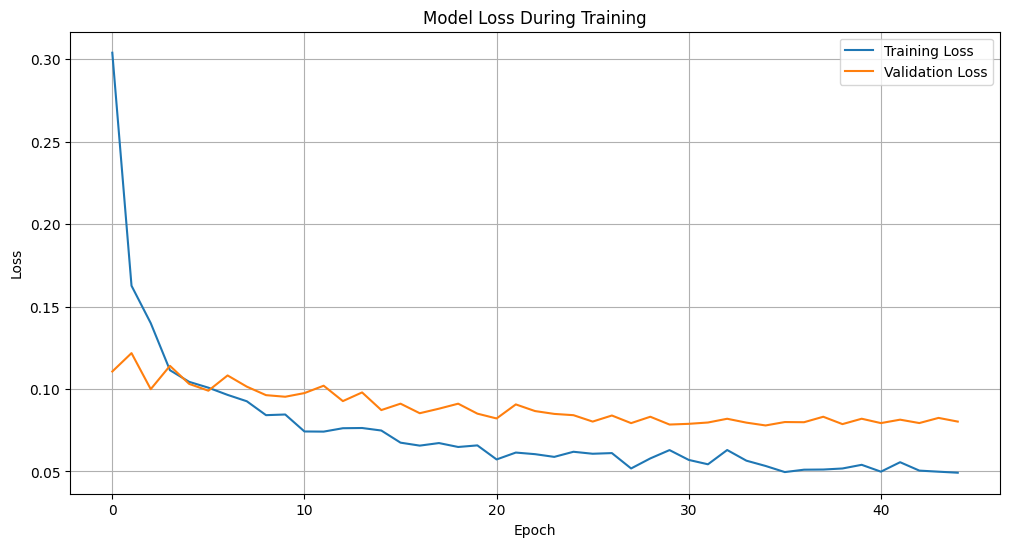

In [72]:
plot_history(history)

### 테스트 데이터로 실제 성능 확인해보기

In [73]:
# model에 X_test를 넣어 예측값을 추출합니다.
y_pred = model.predict(X_test)

# mae를 산출 후 확인합니다.
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')


3/3 [==============================] - 1s 13ms/step
Mean Absolute Error: 0.21898670019872524


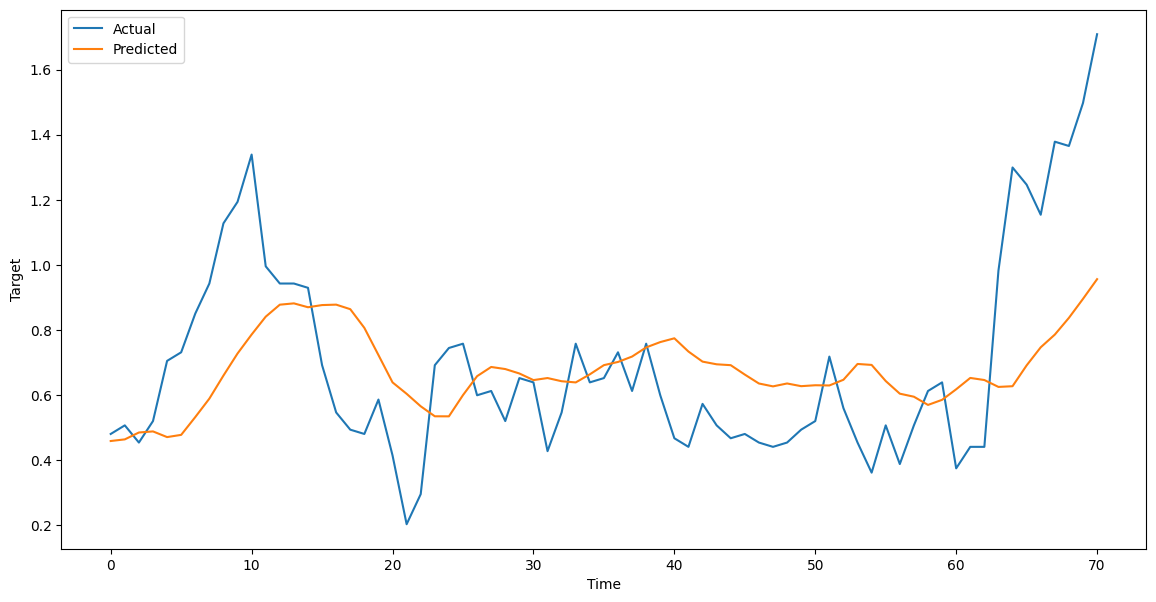

In [74]:
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Target')
plt.legend()
plt.show()

- 실제 가격과 예측 가격의 그래프를 그려보았을 때 성능이 좋지 못함을 알 수 있습니다.
- 실제로 직접적인 가격 예측은 쉽지 않은 문제이며 상승, 하락 여부 예측은 난이도가 더 쉬운 편입니다.
- 만약 현업에서 사용하신다면 직접적인 가격 예측 보다는 n% 상승, 하락 여부를 예측하는 모델을 활용하시는 것이 더욱 좋겠습니다.